In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import tree
from sklearn import svm

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('grouped.csv')
df.head()

,Caucasian,East Asian,Indian,Mixed Race,engnat,AF,AS,EU,NA,OC,...,edu,facebook,google,test site,age,open,conc,extra,agree,neuro
0,1,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0.465909,0.825,0.925,0.850,0.900,0.025
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0.386364,0.400,0.800,0.300,0.625,0.525
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0.022727,0.875,0.975,0.625,0.700,0.900
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0.079545,0.775,0.400,0.300,0.675,0.825
4,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0.147727,0.600,0.600,0.600,0.850,0.500


# Train Multiple Models

In [3]:
X = df.drop(['open', 'conc', 'extra', 'agree', 'neuro'], axis=1)
ys = df[['open', 'conc', 'extra', 'agree', 'neuro']].columns
y = [0]*len(ys)
X_train = [0]*len(ys)
X_test = [0]*len(ys)
y_train = [0]*len(ys)
y_test = [0]*len(ys)

for num,elem in enumerate(ys, start=0):
    y[num] = df[elem]
    X_train[num], X_test[num], y_train[num], y_test[num] = train_test_split(X,y[num],test_size=0.2)

### Decision Tree

In [7]:
dt_train = [0]*len(ys)
dt_test = [0]*len(ys)
dt = tree.DecisionTreeRegressor()
for num in range(len(ys)):
    dt = dt.fit(X_train[num], y_train[num])
    dt_train[num] = dt.score(X_train[num], y_train[num])
    dt_test[num] = dt.score(X_test[num], y_test[num])

## SVM

In [9]:
svm_train = [0]*len(ys)
svm_test = [0]*len(ys)
svm = svm.SVR()
for num in range(len(ys)):
    svm = svm.fit(X_train[num], y_train[num])
    svm_train[num] = svm.score(X_train[num], y_train[num])
    svm_test[num] = svm.score(X_test[num], y_test[num])

## Nearest Neighbours

In [14]:
neighbours_train = []
neighbours_test = []

for i in range(1,20):
    knn_train = [0]*len(ys)
    knn_test = [0]*len(ys)
    knn = neighbors.KNeighborsRegressor(n_neighbors = i)
    for num in range(len(ys)):
        knn = knn.fit(X_train[num], y_train[num])
        knn_train[num] = knn.score(X_train[num], y_train[num])
        knn_test[num] = knn.score(X_test[num], y_test[num])
    neighbours_train.append(knn_train)
    neighbours_test.append(knn_test)

# Compare Models

### Decision Tree

In [16]:
print(ys)
print(dt_train)
print(dt_test)

Index(['open', 'conc', 'extra', 'agree', 'neuro'], dtype='object')
[0.3874952482272517, 0.3888303128860576, 0.3467203700627543, 0.4020484752583088, 0.3868037629793222]
[-0.23143820393906767, -0.26321942069826565, -0.2969708388011676, -0.26270606669094754, -0.29103596543144206]


### SVM

In [17]:
print(ys)
print(svm_train)
print(svm_test)

Index(['open', 'conc', 'extra', 'agree', 'neuro'], dtype='object')
[0.09290878203255439, 0.08651298930513751, 0.03994522273298318, 0.10736335242105466, 0.09101703921085014]
[0.05801243782311727, 0.08376528651080495, 0.027176421396259753, 0.059567650890218204, 0.0704557804332091]


### KNN

In [18]:
neighbours_train = pd.DataFrame(neighbours_train)
neighbours_test = pd.DataFrame(neighbours_test)

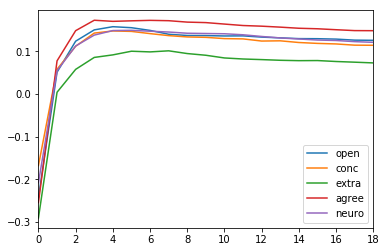

In [21]:
neighbours_train.columns = ys
neighbours_train.plot()

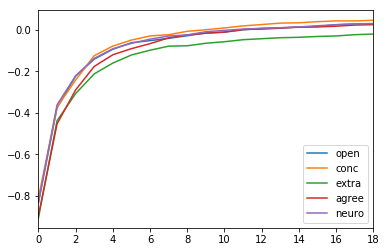

In [22]:
neighbours_test.columns = ys
neighbours_test.plot()

In [23]:
neighbours_test

,open,conc,extra,agree,neuro
0,-0.831901,-0.810387,-0.907963,-0.896135,-0.833442
1,-0.375898,-0.372160,-0.438027,-0.453739,-0.361520
2,-0.222667,-0.241469,-0.307014,-0.289248,-0.220687
3,-0.140612,-0.123868,-0.211660,-0.175718,-0.136952
4,-0.092561,-0.077375,-0.159575,-0.119385,-0.090565
5,-0.061204,-0.048467,-0.120428,-0.089896,-0.063963
6,-0.051071,-0.028368,-0.097387,-0.065732,-0.043967
7,-0.039725,-0.022457,-0.077832,-0.037455,-0.028521
8,-0.027505,-0.006084,-0.075942,-0.023594,-0.023482
9,-0.013995,0.001653,-0.063840,-0.015335,-0.007911
